In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sktime.datasets import load_airline
X = load_airline()

def fourierTransform(seq):
    dft_seq = np.fft.fft(seq)
    return pd.Series(dft_seq)

def inverseFourierTransform(seq):
    idft_seq = np.fft.ifft(seq)
    return pd.Series(idft_seq)

In [5]:
X_ft = fourierTransform(X)

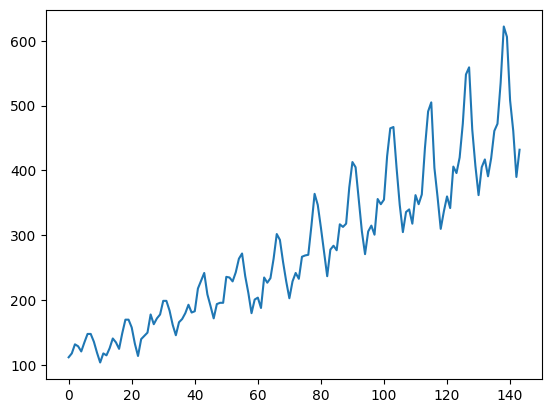

In [6]:
plt.plot(X.tolist())

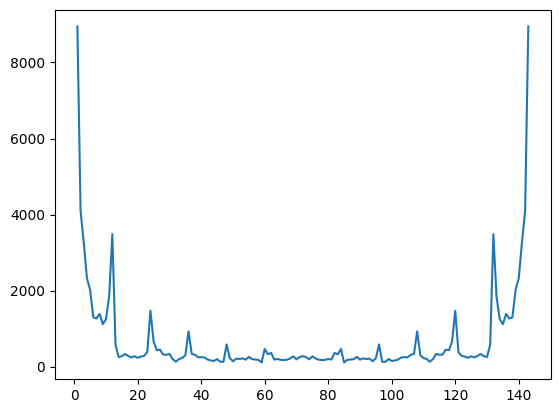

In [7]:
plt.plot(np.abs(X_ft[1:]))

c:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


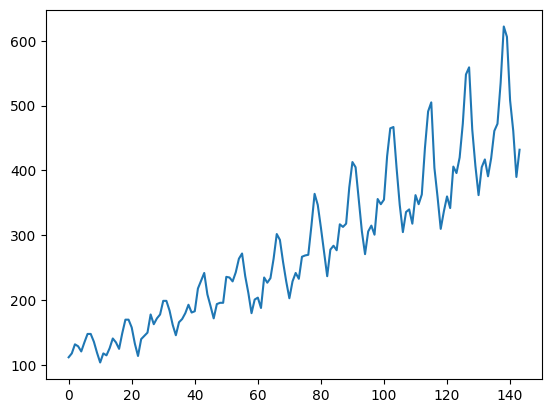

In [8]:
plt.plot(inverseFourierTransform(X_ft))

In [41]:
df = pd.read_csv("data/data60.csv")

passengers = [df[(df["line"] == f"{i+1}A") & (df["year"] < 2024)]["passengersBoarding"].tolist() for i in range(6)]
passengers_ft = [fourierTransform(passenger_line) for passenger_line in passengers]
passengers_ft_real = [np.abs(passenger_line)[:(len(passenger_line) // 2)] for passenger_line in passengers_ft]

max_magnitude_of_passengers = []
for passenger_line in passengers_ft:
    max_magnitude_of_line = []
    max_val = np.max(np.abs(passenger_line[1:]))
    for obs in passenger_line[1:]:
        if np.abs(obs) != max_val:
            max_magnitude_of_line.append(0)
        else:
            max_magnitude_of_line.append(obs)
    max_magnitude_of_passengers.append(max_magnitude_of_line)

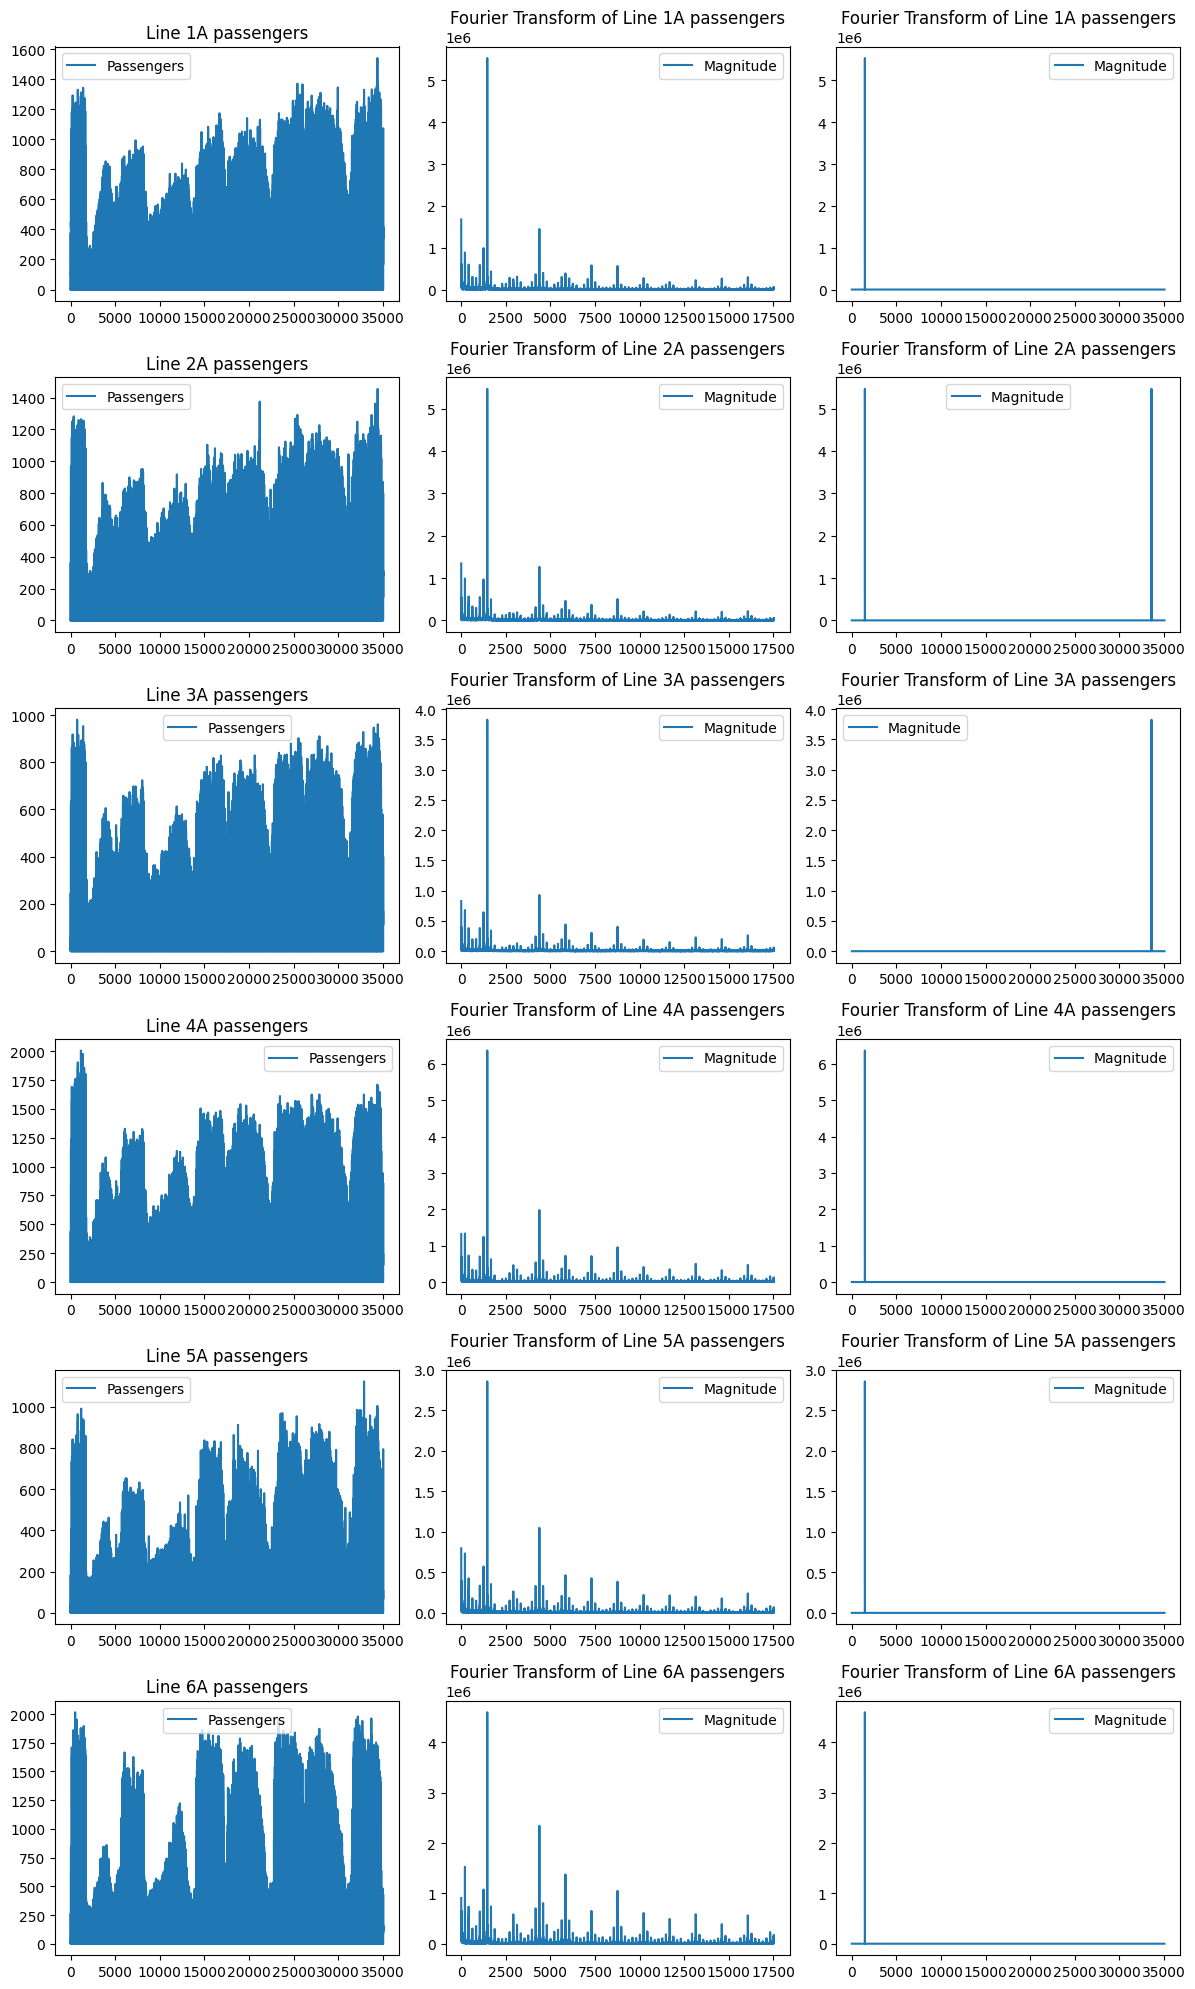

In [43]:
# Create a 3x4 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot on each subplot
for i in range(0, 6):
    axes[i*3].plot(passengers[i], label=f"Passengers")
    axes[i*3].set_title(f"Line {i+1}A passengers")
    axes[i*3].legend()

    axes[(i*3)+1].plot(passengers_ft_real[i][1:], label=f"Magnitude")
    axes[(i*3)+1].set_title(f"Fourier Transform of Line {i+1}A passengers")
    axes[(i*3)+1].legend()

    axes[(i*3)+2].plot(np.abs(max_magnitude_of_passengers[i]), label=f"Magnitude")
    axes[(i*3)+2].set_title(f"Fourier Transform of Line {i+1}A passengers")
    axes[(i*3)+2].legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()